Link com o repositório base do curso: https://github.com/alura-cursos/ia-datascience-dataviz/tree/main

# Aula 1

In [1]:
url_clientes = 'https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/refs/heads/main/dados/zoop_clientes.csv'
url_vendas = 'https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/refs/heads/main/dados/zoop_vendas.csv'

In [2]:
import pandas as pd

In [3]:
clientes = pd.read_csv(url_clientes)
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [4]:
vendas = pd.read_csv(url_vendas)
vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


## Base de clientes
# Prompt

Vamos atuar como analista de dados de um e-commerce. Recebemos duas bases de dados com os dados dos clientes e das vendas em 2023, respectivamente.

Neste primeiro momento, vamos explorar a base clientes no formato de um DataFrame, chamado "clientes". Ela contém dados dos clientes que realizaram comprar na loja virtual, sendo eles: ID da compra, ID do cliente, a cidade, estado e região da compra, idade, sexo biológico, se participam do programa de cashback e avaliação da compra.

Queremos fazer uma breve exploração dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base já estão limpos e tratados. Construa um código para executar esta etapa usando o Python.

Não é necessário utilizar "print()" para mostrar o resultado das consultas.

In [5]:
# Visualizar as primeiras linhas do DataFrame
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [6]:
# Estrutura geral do DataFrame (tipos de dados e valores não nulos)
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [7]:
# Estatísticas descritivas para variáveis numéricas
clientes.describe()

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [8]:
# Estatísticas descritivas para variáveis categóricas
clientes.describe(include='object')

,cidade,uf,regiao,sexo_biologico,cashback
count,6169,6169,6169,6169,6169
unique,96,27,5,2,2
top,São Paulo,São Paulo,Sudeste,Feminino,Não
freq,458,1500,2666,3371,3557


In [9]:
# Distribuição de clientes por região
clientes['regiao'].value_counts()

,count
regiao,
Sudeste,2666
Nordeste,1882
Sul,819
Centro-Oeste,495
Norte,307


In [10]:
# Distribuição de clientes por estado
clientes['uf'].value_counts()

,count
uf,
São Paulo,1500
Rio de Janeiro,570
Minas Gerais,478
Bahia,453
Pernambuco,411
Paraná,383
Rio Grande do Sul,329
Ceará,284
Paraíba,279


In [11]:
# Distribuição por sexo biológico
clientes['sexo_biologico'].value_counts()

,count
sexo_biologico,
Feminino,3371
Masculino,2798


In [12]:
# Participação no programa de cashback
clientes['cashback'].value_counts()

,count
cashback,
Não,3557
Sim,2612


In [13]:
# Distribuição das avaliações das compras
clientes['avaliacao_compra'].value_counts().sort_index()

,count
avaliacao_compra,
0,32
1,33
2,58
3,60
4,113
5,90
6,135
7,689
8,923


In [14]:
# Análise básica da idade
clientes['idade'].describe()

,idade
count,6169.000000
mean,38.260010
std,9.838951
min,18.000000
25%,31.000000
50%,38.000000
75%,45.000000
max,70.000000


## Base de vendas
# Prompt:
Agora vamos explorar a base de vendas no formato de um DataFrame, chamado "vendas". Ela contém dados das vendas do e-commerce, sendo eles: ID da compra, data da compra, horário da compra, categoria do produto, preco unitário do produto, quantidade vendida, frete e o método do pagamento.

Queremos fazer uma breve exploração dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base também já estão limpos e tratados. Construa um código para executar esta etapa usando o Python.

In [15]:
# Visualizar as primeiras linhas do DataFrame
vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [16]:
# Informações gerais sobre a estrutura dos dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [17]:
vendas['data'] = pd.to_datetime(vendas['data'], format='%Y-%m-%d')

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_compra         6169 non-null   int64         
 1   data              6169 non-null   datetime64[ns]
 2   horario           6169 non-null   object        
 3   categoria         6169 non-null   object        
 4   preco_unitario    6169 non-null   float64       
 5   quantidade        6169 non-null   int64         
 6   frete             6169 non-null   float64       
 7   metodo_pagamento  6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [18]:
# Estatísticas descritivas das variáveis numéricas
vendas.describe()

,ID_compra,data,preco_unitario,quantidade,frete
count,6169.000000,6169,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000
std,1780.981237,NaN,1852.064342,1.420725,366.149225


In [19]:
# Estatísticas descritivas das variáveis categóricas
vendas.describe(include='object')

,horario,categoria,metodo_pagamento
count,6169,6169,6169
unique,659,8,4
top,23:56,Alimentos e bebidas,Cartão de Crédito
freq,26,1495,2851


In [20]:
# Quantidade de vendas por categoria de produto
vendas['categoria'].value_counts()

,count
categoria,
Alimentos e bebidas,1495
Beleza e cuidados pessoais,1062
Casa e limpeza,1041
Eletrodomésticos,665
Eletrônicos,580
Papelaria e escritório,551
Ferramentas e construção,474
Livros,301


In [21]:
# Distribuição dos métodos de pagamento
vendas['metodo_pagamento'].value_counts()

,count
metodo_pagamento,
Cartão de Crédito,2851
PIX,2244
Cartão de Débito,547
Boleto,527


In [22]:
# Análise básica do preço unitário
vendas['preco_unitario'].describe()


,preco_unitario
count,6169.000000
mean,873.234738
std,1852.064342
min,2.900000
25%,44.900000
50%,93.900000
75%,221.900000
max,8000.000000


In [23]:
# Análise da quantidade vendida por pedido
vendas['quantidade'].describe()

,quantidade
count,6169.000000
mean,3.004863
std,1.420725
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [24]:
# Análise do valor do frete
vendas['frete'].describe()

,frete
count,6169.000000
mean,119.233832
std,366.149225
min,0.000000
25%,0.320000
50%,7.550000
75%,29.240000
max,4521.540000


In [25]:
# Verificar volume de vendas por data
vendas['data'].value_counts().sort_index()

,count
data,
2023-01-03,9
2023-01-04,11
2023-01-05,10
2023-01-06,9
2023-01-07,11
...,...
2023-12-27,39
2023-12-28,36
2023-12-29,39


In [26]:
# Verificar volume de vendas por horário
vendas['horario'].value_counts().sort_index()

,count
horario,
00:00,9
00:01,8
00:02,10
00:03,16
00:04,14
...,...
23:55,18
23:56,26
23:57,16


# Prompt:
Vamos agora unir as duas bases do nosso projeto em uma só utilizando como chave a coluna "ID_compra". Além disso, vamos organizar as colunas na seguinte sequência:

- ID_compra
- data
- horario
- categoria
-preco_unitario
- quantidade
- frete
- metodo_pagamento
- ID_cliente
- idade
- sexo_biologico
- cidade
- uf
- regiao
- cashback
- avaliacao_compra
<br>
Construa um código para executar esta etapa usando o Python e a biblioteca Pandas.

In [27]:
#import pandas as pd

# União das bases utilizando ID_compra como chave
df = pd.merge(
    vendas,
    clientes,
    on='ID_compra',
    how='inner'
)

# Reorganização das colunas conforme sequência solicitada
df = df[
    [
        'ID_compra',
        'data',
        'horario',
        'categoria',
        'preco_unitario',
        'quantidade',
        'frete',
        'metodo_pagamento',
        'ID_cliente',
        'idade',
        'sexo_biologico',
        'cidade',
        'uf',
        'regiao',
        'cashback',
        'avaliacao_compra'
    ]
]

# Visualização das primeiras linhas do DataFrame final
df.head()


,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


# Prompt

Agora com o nosso "df" já construído por meio das duas bases do projeto, vamos iniciar um novo processo. Queremos iniciar a etapa da geração dos visuais que possam auxiliar na análise do faturamento ao longo do ano, perfil do cliente e outros dados que possam ser relevantes à análise e construção do nosso storytelling.

As colunas de "df" são:

- ID_compra: número único atribuído a compra realizada, no formato int
- data: data da compra, no formato datetime
- horario: horário da compra no formato object
- categoria: categoria do produto, no formato object
- preco_unitario: preço de uma unidade do produto, no formato float
- quantidade: quantidade vendida do produto, no formato int
- frete: frete a ser pago no total da compra, no formato float
- metodo_pagamento: método de pagamento da compra, no formato object
- ID_cliente: número único atribuído ao cliente, no formato int
- idade: idade do cliente, no formato int
- sexo_biologico: sexo biológico do cliente, no formato object
- cidade: cidade do cliente, no formato object
- uf: unidade federativa do cliente, no formato object
- regiao: região do cliente, no formato object
- cashback: se o cliente participa ou não do programa de cashback da loja, no formato object
- avaliacao_compra: avaliação do cliente pela compra, no formato int
<br>
O objetivo é abstrair e buscar relações para construir visuais interessantes para a análise dos dados dos clientes e vendas da Zoop.

Com base nas informações fornecidas, quais tipos de visualizações seriam úteis para atingir o objetivo de analisar os dados?

# Resposta do ChatGpt

# Análise Exploratória e Visualização de Dados — E-commerce Zoop

Com o DataFrame `df` consolidado, inicia-se a etapa de **geração de visualizações** com o objetivo de apoiar a análise de faturamento, perfil dos clientes e comportamento de compra ao longo de 2023.  
Esses visuais servirão como base para a construção do **storytelling analítico** do e-commerce Zoop.

---

## 1. Análise de Faturamento e Performance de Vendas

### 1.1 Faturamento ao longo do tempo (Ano / Mês)
**Visual sugerido:**  
- Gráfico de linha (série temporal)

**Métrica:**  
- Faturamento = `(preco_unitario × quantidade) + frete`

**Insights esperados:**  
- Identificação de sazonalidade  
- Meses com maior e menor volume de vendas  
- Tendência de crescimento ou retração ao longo do ano  

---

### 1.2 Faturamento por categoria de produto
**Visual sugerido:**  
- Gráfico de barras  
- Treemap (para visão executiva)

**Insights esperados:**  
- Categorias mais rentáveis  
- Concentração de faturamento  
- Oportunidades de diversificação do portfólio  

---

### 1.3 Ticket médio por período ou categoria
**Visual sugerido:**  
- Gráfico de barras  
- Boxplot

**Insights esperados:**  
- Valor médio gasto por compra  
- Comparação entre categorias  
- Identificação de produtos de maior valor agregado  

---

## 2. Perfil e Comportamento do Cliente

### 2.1 Distribuição etária dos clientes
**Visual sugerido:**  
- Histograma  
- Boxplot

**Insights esperados:**  
- Faixas etárias predominantes  
- Perfil etário do público consumidor  
- Subsídios para estratégias de marketing segmentado  

---

### 2.2 Perfil de clientes por sexo biológico
**Visual sugerido:**  
- Gráfico de barras  
- Gráfico de rosca (donut)

**Insights esperados:**  
- Participação relativa por sexo  
- Diferenças no comportamento de compra  

---

### 2.3 Distribuição geográfica dos clientes
**Visual sugerido:**  
- Gráfico de barras por região  
- Mapa geográfico (quando aplicável)

**Insights esperados:**  
- Regiões com maior concentração de clientes  
- Potenciais mercados para expansão  
- Indicativos indiretos de impacto logístico  

---

## 3. Cashback e Fidelização

### 3.1 Comparação de faturamento: clientes com cashback vs. sem cashback
**Visual sugerido:**  
- Gráfico de barras  
- Boxplot

**Insights esperados:**  
- Impacto do programa de cashback no faturamento  
- Diferença de comportamento entre clientes fidelizados e não fidelizados  

---

### 3.2 Frequência de compras por tipo de cliente
**Visual sugerido:**  
- Gráfico de barras

**Insights esperados:**  
- Indicativos de retenção  
- Efetividade do programa de fidelidade  

---

## 4. Avaliação da Experiência do Cliente

### 4.1 Distribuição das avaliações das compras
**Visual sugerido:**  
- Gráfico de barras  
- Histograma

**Insights esperados:**  
- Nível geral de satisfação  
- Concentração de avaliações positivas ou negativas  

---

### 4.2 Avaliação média por categoria ou região
**Visual sugerido:**  
- Gráfico de barras  
- Heatmap

**Insights esperados:**  
- Categorias com maior incidência de problemas  
- Regiões com melhor ou pior percepção do cliente  
- Apoio à tomada de decisão operacional  

---

## 5. Métodos de Pagamento e Jornada de Compra

### 5.1 Distribuição dos métodos de pagamento
**Visual sugerido:**  
- Gráfico de barras  
- Gráfico de rosca

**Insights esperados:**  
- Preferências dos clientes  
- Dependência de determinados meios de pagamento  

---

### 5.2 Horário das compras
**Visual sugerido:**  
- Gráfico de barras  
- Heatmap (horário × dia)

**Insights esperados:**  
- Horários de maior conversão  
- Base para definição de campanhas promocionais  

---

## 6. Análises de Relação e Correlação

### 6.1 Correlação entre preço, quantidade e avaliação
**Visual sugerido:**  
- Heatmap de correlação  
- Scatter plot

**Insights esperados:**  
- Sensibilidade ao preço  
- Relação entre valor pago e satisfação do cliente  

---

## Conclusão Analítica

As visualizações propostas permitem responder a questões estratégicas como:

- De onde vem o faturamento da Zoop?  
- Quem são os clientes mais relevantes para o negócio?  
- Quais categorias e regiões impulsionam as vendas?  
- O programa de cashback gera valor real?  
- Como a experiência do cliente impacta o desempenho comercial?

Esses insights servem como base para a construção de dashboards e análises mais aprofundadas, apoiando a tomada de decisão orientada por dados.


# Aula 2

1º Questionamento: Quais foram os métodos de pagamentos mais utilizados em 2023?

## Prompt

Temos um DataFrame chamado "df" e queremos construir um visual que apresente quais métodos de pagamentos foram os mais utilizados.

Em "df", temos a coluna "metodo_pagamento" com os 4 tipos de pagamento utilizado na compra.

Inicialmente, queremos construir uma tabela chamada "metodos_de_pagamento" que resuma os dados dessa coluna e, na sequência, desejamos criar uma visualização que apresente a quantidade desses métodos de pagamento presentes na tabela "metodo_pagamento".

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [28]:
#import pandas as pd

# Tabela resumo com a quantidade de cada método de pagamento
metodos_de_pagamento = (
    df['metodo_pagamento']
    .value_counts()
    .reset_index()
)

# Renomeando as colunas para melhor interpretação
metodos_de_pagamento.columns = ['metodo_pagamento', 'quantidade']

metodos_de_pagamento


,metodo_pagamento,quantidade
0,Cartão de Crédito,2851
1,PIX,2244
2,Cartão de Débito,547
3,Boleto,527


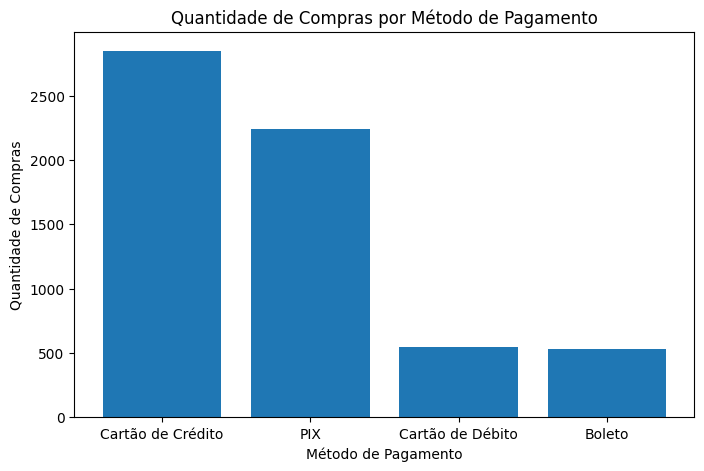

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(
    metodos_de_pagamento['metodo_pagamento'],
    metodos_de_pagamento['quantidade']
)

plt.title('Quantidade de Compras por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade de Compras')

plt.show()


2º Questionamento: Qual foi o faturamento por categoria em 2023?<br>
*Observação:* Para o faturamento, vamos considerar aqui o produto entre o preço unitário e a quantidade somadas ao frete de cada produto.

## Prompt:
Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de barras horizontais que apresente o faturamento por categoria da Zoop.

Em "df", temos as colunas:

- categoria: categorias dos produtos
- preco_unitario: preço de uma unidade do produto
- quantidade: quantidade vendida do produto
- frete: frete a ser pago no total da compra.
<br>
Desejamos criar uma visualização que apresente o faturamento de cada categoria, em que o faturamento é dado pelo produto entre o preço unitário e a quantidade somadas ao frete.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [30]:
#import pandas as pd

# Criação da coluna de faturamento por compra
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupamento do faturamento por categoria
faturamento_categoria = (
    df.groupby('categoria')['faturamento']
    .sum()
    .sort_values()
    .reset_index()
)

faturamento_categoria


,categoria,faturamento
0,Papelaria e escritório,47239.62
1,Livros,78380.24
2,Alimentos e bebidas,241663.20
3,Ferramentas e construção,264552.08
4,Casa e limpeza,331036.13
5,Beleza e cuidados pessoais,441649.72
6,Eletrodomésticos,4548591.79
7,Eletrônicos,11025894.73


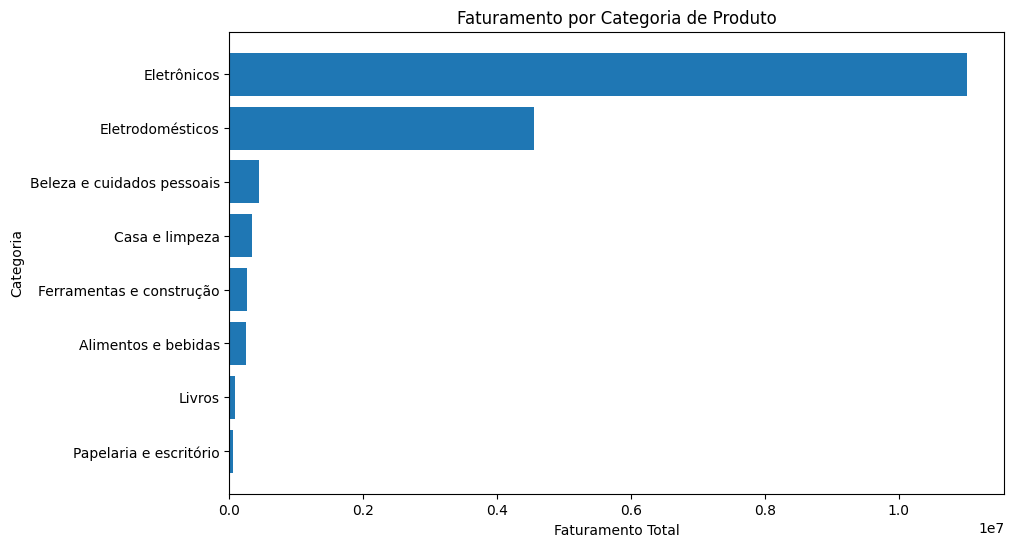

In [31]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.barh(
    faturamento_categoria['categoria'],
    faturamento_categoria['faturamento']
)

plt.title('Faturamento por Categoria de Produto')
plt.xlabel('Faturamento Total')
plt.ylabel('Categoria')

plt.show()


3º Questionamento: Como foram as vendas ao longo dos meses em 2023?<br>

*Observação:* É importante especificar como a sua variável tempo está especificada dentro da base para o ChatGPT alcançar resultados melhores na sugestão do visual

## Prompt:
Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de linha que apresente as vendas totais mensais da Zoop.

Em "df", temos as colunas:

- data: com as datas das compras no formato datetime (aaaa-mm-dd)
- faturamento: dado pelo produto entre o preço unitário e a quantidade somadas ao frete de cada venda.
<br>
Desejamos criar uma visualização que apresente as vendas por mês. Prmeiro, agrupe os dados por mês e depois crie uma nova coluna chamada "mes" que receba o nome de cada mês, traduzindo os meses do índice por meio do dicionário abaixo. Utilize a coluna "data" para o agrupamento dos dados e construção do gráfico. A coluna "mes" só deve ser utilizada para alterar os rótulos do eixo x.

```
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}
```


Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [32]:
#import pandas as pd

# Garantindo que a coluna data está no formato datetime
df['data'] = pd.to_datetime(df['data'])

# Agrupando o faturamento por mês usando a coluna data
vendas_mensais = (
    df
    .groupby(df['data'].dt.to_period('M'))['faturamento']
    .sum()
    .to_frame()
)

# Convertendo o índice para datetime (para extração do nome do mês)
vendas_mensais.index = vendas_mensais.index.to_timestamp()

vendas_mensais


,faturamento
data,
2023-01-01,586383.51
2023-02-01,445347.92
2023-03-01,572803.02
2023-04-01,554309.04
2023-05-01,1608193.84
2023-06-01,1543645.78
2023-07-01,810660.53
2023-08-01,2038069.76
2023-09-01,821239.89


In [33]:
# Dicionário de tradução dos meses
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Criando a coluna mes apenas para rótulos do eixo x
vendas_mensais['mes'] = vendas_mensais.index.month_name().map(meses)

vendas_mensais


,faturamento,mes
data,,
2023-01-01,586383.51,Jan
2023-02-01,445347.92,Fev
2023-03-01,572803.02,Mar
2023-04-01,554309.04,Abr
2023-05-01,1608193.84,Mai
2023-06-01,1543645.78,Jun
2023-07-01,810660.53,Jul
2023-08-01,2038069.76,Ago
2023-09-01,821239.89,Set


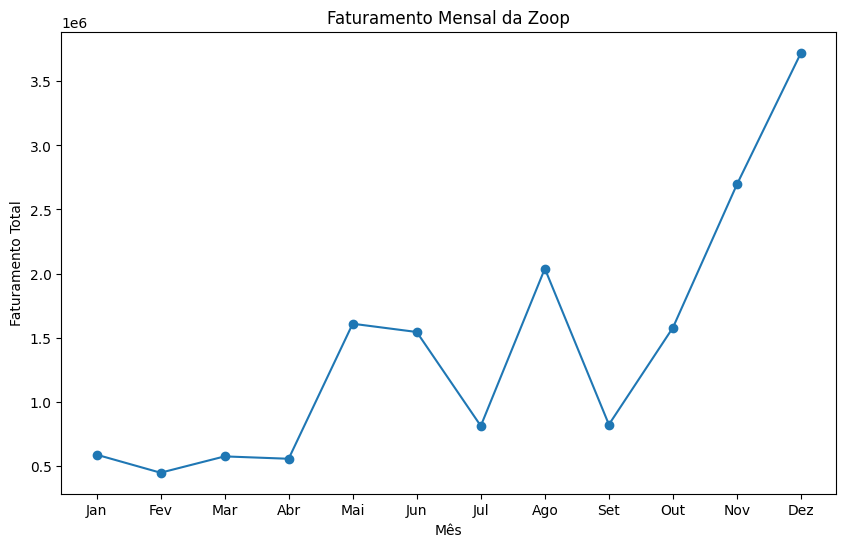

In [34]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(
    vendas_mensais['mes'],
    vendas_mensais['faturamento'],
    marker='o'
)

plt.title('Faturamento Mensal da Zoop')
plt.xlabel('Mês')
plt.ylabel('Faturamento Total')

plt.show()


4º Questionamento: Como esta dividida a venda por trimestre por método de pagamento? Existe um período em que algum tipo de pagamento se sobressai?
## Prompt:
Temos um DataFrame chamado "df" e queremos construir um visual de gráfico de barras empilhadas que apresente as vendas por trimestre em relação ao método de pagamento da Zoop.

Em "df", temos as colunas:

data: com as datas das compras no formato datetime (aaaa-mm-dd)
faturamento: com os valores das vendas
metodo_pagamento: com o método de pagamento escolhido na compra
Desejamos criar uma visualização que apresente as vendas por trimestre, agrupando os métodos de pagamento de cada trimestre correspondente a cada compra.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [35]:
#import pandas as pd

# Garantindo que a coluna data está no formato datetime
df['data'] = pd.to_datetime(df['data'])

# Criação da coluna de trimestre
df['trimestre'] = df['data'].dt.to_period('Q')

# Agrupamento do faturamento por trimestre e método de pagamento
vendas_trimestre_pagamento = (
    df
    .groupby(['trimestre', 'metodo_pagamento'])['faturamento']
    .sum()
    .unstack(fill_value=0)
)

# Convertendo o índice para string para facilitar a visualização
vendas_trimestre_pagamento.index = vendas_trimestre_pagamento.index.astype(str)

vendas_trimestre_pagamento


metodo_pagamento,Boleto,Cartão de Crédito,Cartão de Débito,PIX
trimestre,,,,
2023Q1,159392.78,567801.62,160984.48,716355.57
2023Q2,408176.22,1675152.84,271050.18,1351769.42
2023Q3,323562.78,1899375.64,166394.70,1280637.06
2023Q4,775944.52,3627098.81,683999.86,2911311.03


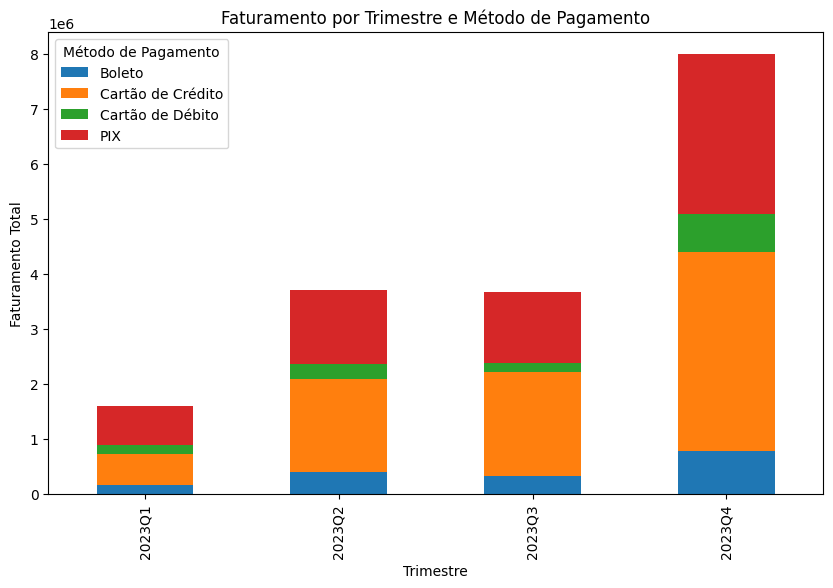

In [36]:
#import matplotlib.pyplot as plt

vendas_trimestre_pagamento.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.title('Faturamento por Trimestre e Método de Pagamento')
plt.xlabel('Trimestre')
plt.ylabel('Faturamento Total')
plt.legend(title='Método de Pagamento')

plt.show()


# Aula 3

5º Questionamento: Qual a proporção da clientela que participa de nosso programa de cashback?
## Prompt:
Temos um DataFrame chamado "df" e queremos construir um visual que apresente a proporção dos(as) usuários(as) que estão aderindo o programa de cashback da Zoop.

Em "df", temos a coluna "cashback" que dispõe de tais dados.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [37]:
#import pandas as pd

# Resumo da adesão ao programa de cashback
cashback_resumo = (
    df['cashback']
    .value_counts()
    .reset_index()
)

cashback_resumo.columns = ['cashback', 'quantidade']

cashback_resumo


,cashback,quantidade
0,Não,3557
1,Sim,2612


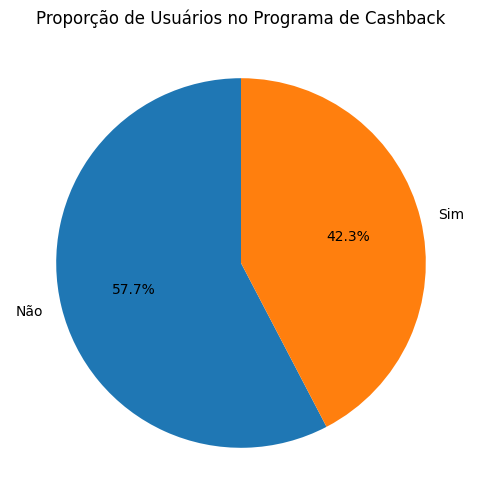

In [38]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

plt.pie(
    cashback_resumo['quantidade'],
    labels=cashback_resumo['cashback'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Proporção de Usuários no Programa de Cashback')

plt.show()


## Prompt:
Você conseguiria inverter as cores e alterar o gráfico anterior para um do tipo rosca?

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

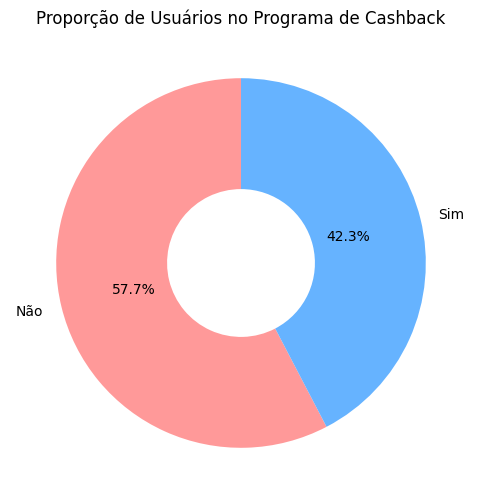

In [39]:
#import matplotlib.pyplot as plt

# Definição das cores (invertidas em relação ao padrão anterior)
cores = ['#ff9999', '#66b3ff']  # exemplo: Não / Sim (invertido)

plt.figure(figsize=(6, 6))

plt.pie(
    cashback_resumo['quantidade'],
    labels=cashback_resumo['cashback'],
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.6}  # cria o efeito de rosca
)

plt.title('Proporção de Usuários no Programa de Cashback')

plt.show()


6º Questionamento: Como estão distribuidas as avaliações de produto? Temos bons números gerais?

## Prompt:
Temos um DataFrame chamado "df" e queremos construir um visual que apresente a distribuição das avaliações do público em relação as compras feitas na loja online.

Em "df", temos a coluna "avaliacao_compra" com as notas dadas por cada usuário em relação a compra que fizeram que variam de 0 a 10 em números inteiros.

Desejamos criar uma visualização que apresente a distribuição desses dados.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

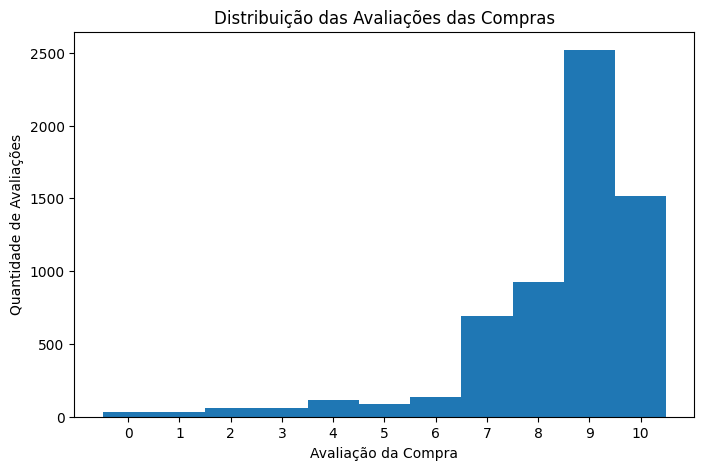

In [40]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.hist(
    df['avaliacao_compra'],
    bins=range(0, 12),  # garante um intervalo por nota (0 a 10)
    align='left'
)

plt.title('Distribuição das Avaliações das Compras')
plt.xlabel('Avaliação da Compra')
plt.ylabel('Quantidade de Avaliações')

plt.xticks(range(0, 11))

plt.show()


7º Questionamento: Como está distribuído o nosso público por idade e sexo biológico? Existe um grupo que sobressai?
## Prompt:
Temos um DataFrame chamado "df" e queremos construir um visual que apresente a distribuição do nosso público por idade e sexo biológico.

Em "df", temos as colunas:

- idade: idade da pessoa que realizou a compra
- sexo_biologico: sexo biológico da pessoa que realizou a compra, com dados categóricos
<br>Desejamos criar uma visualização que apresente a distribuição desses dados.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

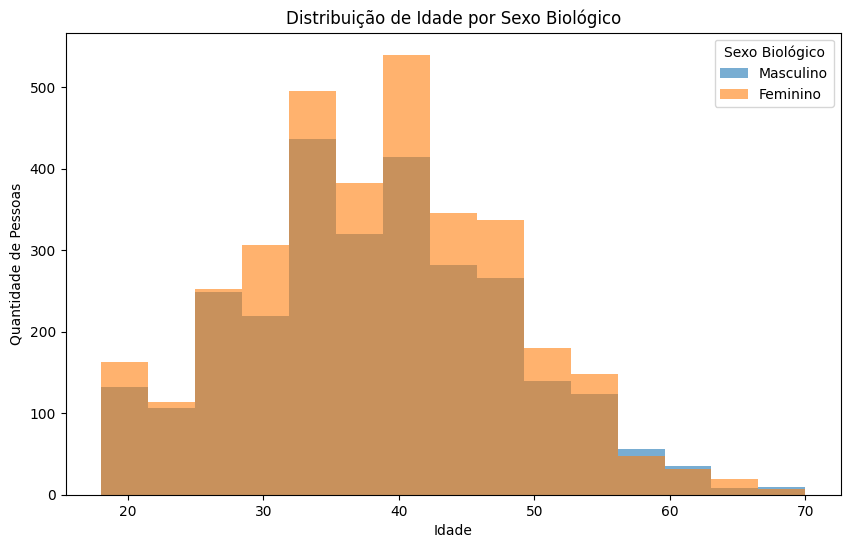

In [41]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Separando os dados por sexo biológico
for sexo in df['sexo_biologico'].unique():
    plt.hist(
        df[df['sexo_biologico'] == sexo]['idade'],
        bins=15,
        alpha=0.6,
        label=sexo
    )

plt.title('Distribuição de Idade por Sexo Biológico')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.legend(title='Sexo Biológico')

plt.show()


## Prompt
Acho que podemos melhorar esse gráfico. Que tal mudar para um boxplot?

<Figure size 1000x800 with 0 Axes>

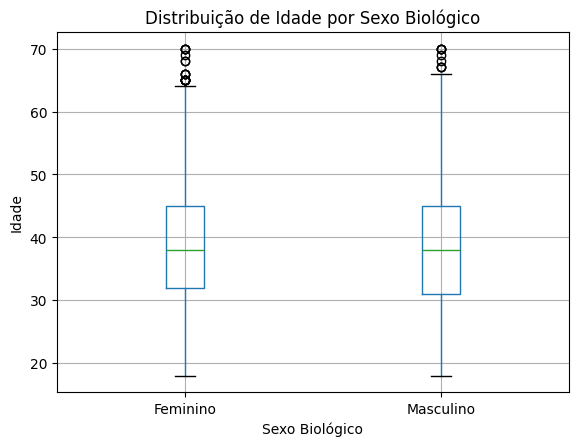

In [42]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Criando o boxplot agrupado por sexo biológico
df.boxplot(
    column='idade',
    by='sexo_biologico'
)

plt.title('Distribuição de Idade por Sexo Biológico')
plt.suptitle('')  # remove o título automático do pandas
plt.xlabel('Sexo Biológico')
plt.ylabel('Idade')

plt.show()


# Aula 4

In [43]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

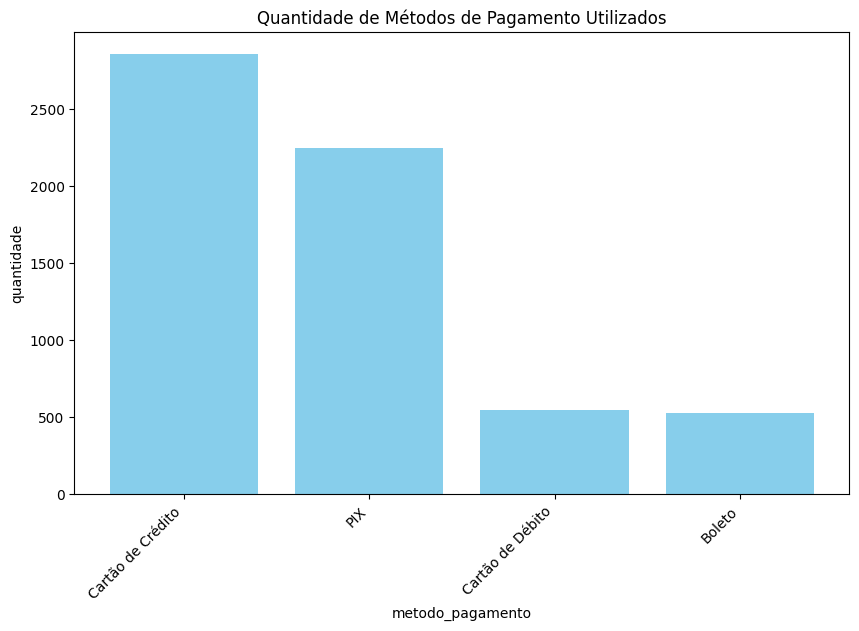

In [47]:
# Visualização
plt.figure(figsize=(10, 6))
plt.bar(metodos_de_pagamento['metodo_pagamento'], metodos_de_pagamento['quantidade'], color='skyblue')
plt.title('Quantidade de Métodos de Pagamento Utilizados')
plt.xlabel('metodo_pagamento')
plt.ylabel('quantidade')
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()

##Prompt:
Agora chegou a hora de refinarmos as nossas visualizações. Vamos começar com o 1º gráfico que fizemos, aquele com os métodos de pagamento?

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, as colunas na cor VERMELHO_1 e o tamanho da figura deve ser de (10, 6).

O título da figura é "Métodos de pagamentos mais utilizados em 2023" com tamanho 18 e sua cor CINZA_5.

Os rótulos do eixo y (yticks) devem ser suprimidos assim como o label do eixo y (ylabel) e os rótulos e label do eixo X (xticks e xlabel) devem ter tamanho 12 com a cor AZUL_1. As bordas do topo, lado direito e esquerdo do gráfico devem ser suprimidas.

Além disso, é necessário exibir o total de cada método de pagamento acima de cada coluna, com o texto também na cor AZUL_1 e tamanho 12.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização. Lembre-se que as variáveis das cores que estamos utilizando possui valores de cores já em hexadecimal.

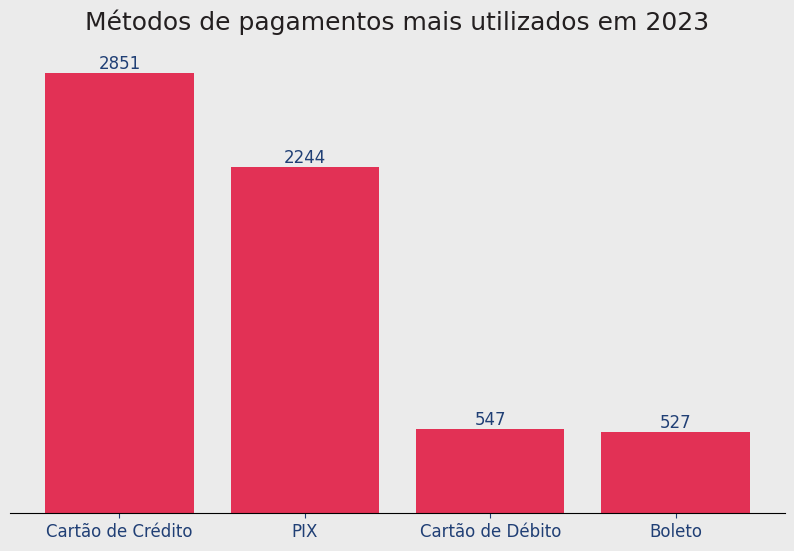

In [48]:
import matplotlib.pyplot as plt

# Criação da figura e do eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Definição das cores de fundo
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# Gráfico de barras
barras = ax.bar(
    metodos_de_pagamento['metodo_pagamento'],
    metodos_de_pagamento['quantidade'],
    color=VERMELHO_1
)

# Título
ax.set_title(
    'Métodos de pagamentos mais utilizados em 2023',
    fontsize=18,
    color=CINZA_5,
    pad=15
)

# Configuração dos eixos
ax.set_ylabel('')
ax.set_yticks([])

ax.set_xlabel('')
ax.tick_params(
    axis='x',
    labelsize=12,
    colors=AZUL_1
)

# Remoção das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Inserção dos valores acima das colunas
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontsize=12,
        color=AZUL_1
    )

plt.show()


##Prompt:
O gráfico ficou muito bom!

Agora quero adicionar um texto dentro da área do plot, vamos lá?

Para isso, some os valores das duas primeiras colunas, divida pela soma de totas as colunas e passe para o formato de porcentagem armazenando na variável "percentual"

Agora, na posição x = 2 e y = 2500, adicione o seguinte texto com tamanho 10 e cor AZUL_3: f"$\\bf{percentual:.2f}$% dos clientes utilizam Cartão de Crédito ou PIX \npara pagamento. Seria interessante recorrer a parcerias\ncom bancos para a construção de um Zoop Pay a fim\nde fidelizar a nossa clientela.".

In [49]:
# Cálculo do percentual dos dois métodos mais utilizados
percentual = (
    metodos_de_pagamento['quantidade'].iloc[0:2].sum()
    / metodos_de_pagamento['quantidade'].sum()
) * 100


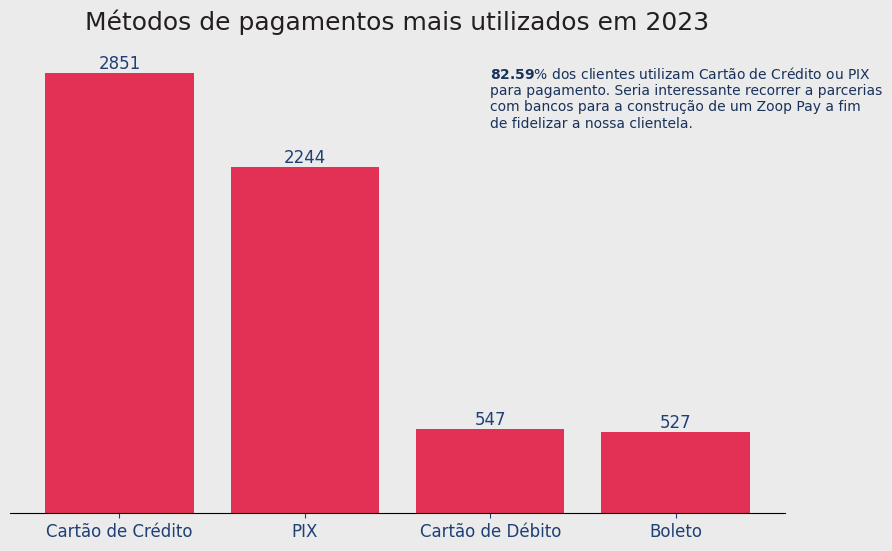

In [52]:
#import matplotlib.pyplot as plt

# Criação da figura e do eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Definição das cores de fundo
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# Gráfico de barras
barras = ax.bar(
    metodos_de_pagamento['metodo_pagamento'],
    metodos_de_pagamento['quantidade'],
    color=VERMELHO_1
)

# Título
ax.set_title(
    'Métodos de pagamentos mais utilizados em 2023',
    fontsize=18,
    color=CINZA_5,
    pad=15
)

# Configuração dos eixos
ax.set_ylabel('')
ax.set_yticks([])

ax.set_xlabel('')
ax.tick_params(
    axis='x',
    labelsize=12,
    colors=AZUL_1
)

# Remoção das bordas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Inserção dos valores acima das colunas
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura,
        f'{int(altura)}',
        ha='center',
        va='bottom',
        fontsize=12,
        color=AZUL_1
    )

ax.text(
    2,
    2500,
    f"$\\bf{{{percentual:.2f}}}$% dos clientes utilizam Cartão de Crédito ou PIX \n"
    "para pagamento. Seria interessante recorrer a parcerias\n"
    "com bancos para a construção de um Zoop Pay a fim\n"
    "de fidelizar a nossa clientela.",
    fontsize=10,
    color=AZUL_3
)


plt.show()




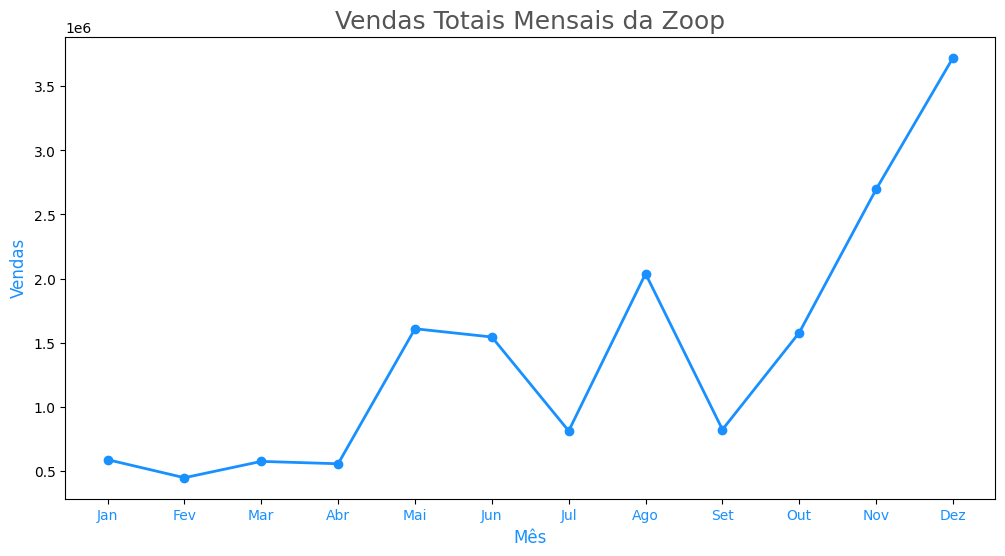

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário de tradução de meses
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Agrupar por mês e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12, color='#1890FF')
plt.ylabel('Vendas', fontsize=12, color='#1890FF')

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10, color='#1890FF')

plt.show()

##Prompt:
Vamos explorar mais um dos gráficos que fizemos? Agora vamos utilizar aquele com as Vendas totais mensais da Zoop. A variável que passa os valores mensais é:



```
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())
Em que df["data"] correspondente as datas no formato datetime e df['faturamento'] os valores das vendas.
```
E o que gerou o gráfico original foi
```
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)
```

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a linha na cor AZUL_1 e o tamanho da figura deve ser de (12, 6).

O título da figura é "Vendas totais mensais em 2023" com tamanho 18 e sua cor CINZA_5.

Os rótulos do eixo y (yticks) devem estar o formato "R$ valor M" com duas casas decimais, tamanho 12 e cor AZUL_1.

Os rótulos do eixo X (xticks) devem ter tamanho 12 com a cor AZUL_1. Já os labels do eixo x e y (xlabel e ylabel) devem ser suprimidos. As bordas do topo e lado direito do gráfico devem ser suprimidas.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização. Lembre-se que as variáveis das cores que estamos utilizando possui valores de cores já em hexadecimal.

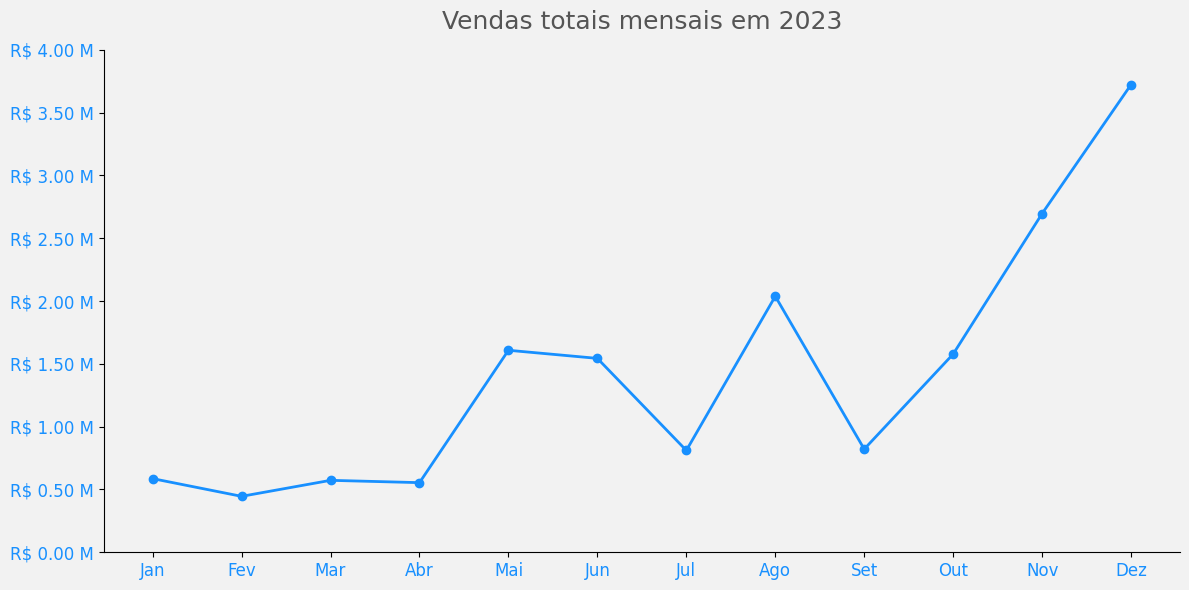

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Cores da identidade Zoop
# (já existentes no projeto)
# =========================
CINZA_1 = '#F2F2F2'
CINZA_5 = '#555555'
AZUL_1 = '#1890FF'

# =========================
# Dicionário de meses
# =========================
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# =========================
# Agrupamento mensal
# =========================
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = (
    df.groupby('mes')['faturamento']
      .sum()
      .reindex(meses.keys())
)

# =========================
# Figura
# =========================
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# =========================
# Linha
# =========================
ax.plot(
    vendas_mensais.index,
    vendas_mensais.values,
    marker='o',
    linewidth=2,
    color=AZUL_1
)

# =========================
# Título
# =========================
ax.set_title(
    'Vendas totais mensais em 2023',
    fontsize=18,
    color=CINZA_5,
    pad=15
)

# =========================
# Eixo Y formatado (R$ X.XX M)
# =========================
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels(
    [f'R$ {y / 1_000_000:.2f} M' for y in yticks],
    fontsize=12,
    color=AZUL_1
)

# =========================
# Eixo X (meses traduzidos)
# =========================
ax.set_xticks(range(len(vendas_mensais.index)))
ax.set_xticklabels(
    [meses[m] for m in vendas_mensais.index],
    fontsize=12,
    color=AZUL_1
)

# =========================
# Suprimir labels
# =========================
ax.set_xlabel('')
ax.set_ylabel('')

# =========================
# Remover bordas superiores e direita
# =========================
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


##Prompt:
Bacana! Agora que o nosso gráfico já está com a identidade visual, vamos adicionar alguns elementos visuais.

Desenhe 4 círculos de raio 200, transparentes com a borda na cor VERMELHO_1 e com o centro nas coordenadas do 5º, 8º, 11º e 12º pontos, respectivamente. No lado esquerdo de cada círculo enumere de 1 a 4.

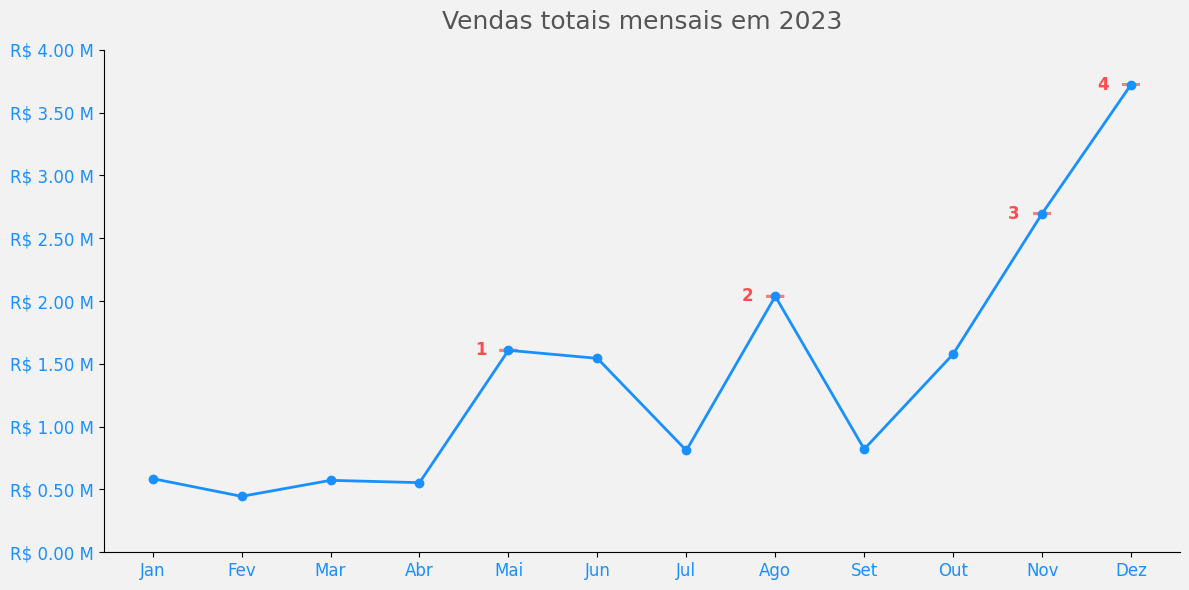

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# =========================
# Cores da identidade Zoop
# =========================
CINZA_1 = '#F2F2F2'
CINZA_5 = '#555555'
AZUL_1  = '#1890FF'
VERMELHO_1 = '#FF4D4F'

# =========================
# Dicionário de meses
# =========================
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# =========================
# Agrupamento mensal
# =========================
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = (
    df.groupby('mes')['faturamento']
      .sum()
      .reindex(meses.keys())
)

# =========================
# Figura
# =========================
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(CINZA_1)
ax.set_facecolor(CINZA_1)

# =========================
# Linha
# =========================
ax.plot(
    range(len(vendas_mensais)),
    vendas_mensais.values,
    marker='o',
    linewidth=2,
    color=AZUL_1
)

# =========================
# Título
# =========================
ax.set_title(
    'Vendas totais mensais em 2023',
    fontsize=18,
    color=CINZA_5,
    pad=15
)

# =========================
# Eixo Y formatado
# =========================
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels(
    [f'R$ {y / 1_000_000:.2f} M' for y in yticks],
    fontsize=12,
    color=AZUL_1
)

# =========================
# Eixo X
# =========================
ax.set_xticks(range(len(vendas_mensais)))
ax.set_xticklabels(
    [meses[m] for m in vendas_mensais.index],
    fontsize=12,
    color=AZUL_1
)

# =========================
# Suprimir labels
# =========================
ax.set_xlabel('')
ax.set_ylabel('')

# =========================
# Remover bordas
# =========================
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# =========================
# Círculos de destaque
# =========================
indices = [4, 7, 10, 11]  # 5º, 8º, 11º e 12º pontos (base 0)

for i, idx in enumerate(indices, start=1):
    x = idx
    y = vendas_mensais.iloc[idx]

    circulo = Circle(
        (x, y),
        radius=0.1,
        fill=False,
        edgecolor=VERMELHO_1,
        linewidth=2,
        alpha=0.7
    )

    ax.add_patch(circulo)

    # Numeração à esquerda do círculo
    ax.text(
        x - 0.25,
        y,
        str(i),
        fontsize=12,
        color=VERMELHO_1,
        weight='bold',
        ha='right',
        va='center'
    )

plt.tight_layout()
plt.show()
